In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [ ]:
X

array([[-0.44043193, -1.42474068],
       [-0.29983722,  2.37909394],
       [ 1.49431244,  1.89864449],
       ...,
       [ 0.68367936, -1.94418353],
       [ 0.32737908, -1.40325302],
       [ 1.31448109, -1.08577046]])

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

<Axes: xlabel='0', ylabel='1'>

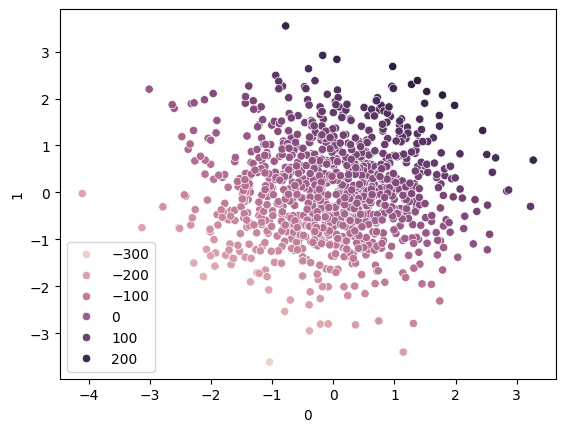

In [ ]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((700, 2), (300, 2), (700,), (300,))

In [ ]:
from sklearn.svm import SVR

In [ ]:
model=SVR(kernel='linear')

In [ ]:
model.fit(X_train,y_train)

SVR(kernel='linear')

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
mean_squared_error(y_test,y_pred)

9.361627328345797

In [ ]:
mean_absolute_error(y_test,y_pred)

2.5460887774211236

In [ ]:
r2_score(y_test,y_pred)

0.9987719611589632

In [ ]:
model.coef_

array([[48.51702533, 72.41127554]])

In [ ]:
#HyperParamater Tuning with SVR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params={'C':[0.1,0.2,0.5,0.7,1,2,3,4,5,6,7,50,100],
        'gamma':[1,0.2,0.02,0.01,0.03],
        'epsilon':[0.01,0.1,0.3,0.03,0.001],
        'kernel':['linear']}
grid=GridSearchCV(SVR(),param_grid=params,scoring='r2',cv=10,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 325 candidates, totalling 3250 fits
[CV 1/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.817 total time=   0.0s
[CV 2/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.830 total time=   0.0s
[CV 3/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.825 total time=   0.0s
[CV 4/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.822 total time=   0.1s
[CV 5/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.831 total time=   0.1s
[CV 6/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.819 total time=   0.0s
[CV 7/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.831 total time=   0.0s
[CV 8/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.824 total time=   0.0s
[CV 9/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.822 total time=   0.0s
[CV 10/10] END C=0.1, epsilon=0.01, gamma=1, kernel=linear;, score=0.821 total time=   0.0s
[CV 1/10] END C=0.1, eps

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.1, 0.2, 0.5, 0.7, 1, 2, 3, 4, 5, 6, 7, 50,
                               100],
                         'epsilon': [0.01, 0.1, 0.3, 0.03, 0.001],
                         'gamma': [1, 0.2, 0.02, 0.01, 0.03],
                         'kernel': ['linear']},
             scoring='r2', verbose=3)

In [ ]:
grid.best_params_

{'C': 6, 'epsilon': 0.03, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
grid.best_score_

0.9987626313819321

In [ ]:
grid.best_estimator_

SVR(C=6, epsilon=0.03, gamma=1, kernel='linear')

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

9.323486582454482

In [ ]:
mean_absolute_error(y_test,y_pred)

2.534521772663711

In [ ]:
r2_score(y_test,y_pred)

0.9987769643828406

In [ ]:
X_test.shape

(300, 2)

In [ ]:
pd.DataFrame(X_test)

,0,1
0,-1.053334,0.395504
1,-0.370016,-1.496935
2,0.473647,-1.200244
3,1.240479,-0.197516
4,-2.126573,-1.795069
...,...,...
295,-0.906669,1.299963
296,-1.611477,0.655735
297,0.002479,0.566980
298,0.077766,0.009444


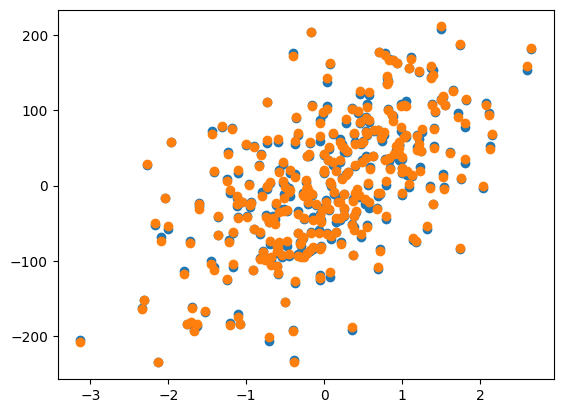

In [ ]:
plt.scatter(pd.DataFrame(X_test)[0],y_test)
plt.scatter(pd.DataFrame(X_test)[0],y_pred)

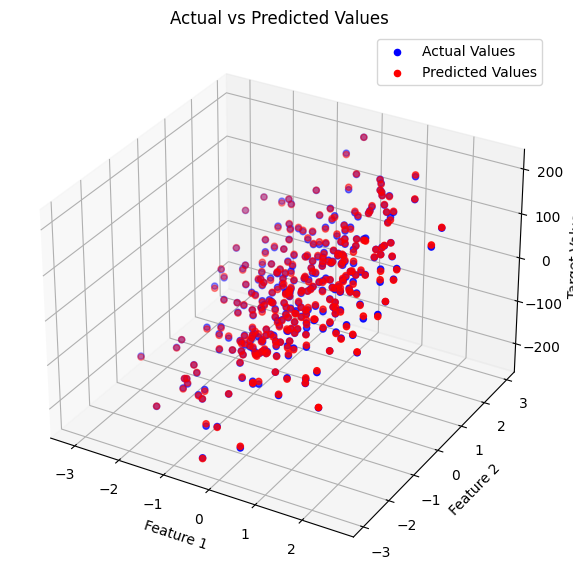

In [ ]:
# Creating a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Feature 1 is X_test[:, 0], Feature 2 is X_test[:, 1]
# Actual values
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, color='blue', label='Actual Values')

# Predicted values
ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, color='red', label='Predicted Values')

# Adding labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Target Value')
ax.set_title('Actual vs Predicted Values')

# Adding legend
ax.legend()

# Show plot
plt.show()